In [5]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation
from keras.optimizers import SGD,Adam,RMSprop
from keras.utils import np_utils
from keras.models import load_model

In [6]:
data = np.load('data.npz')

In [ ]:
x = data[str(199)]

In [ ]:
print(x)

In [ ]:
model = Sequential()

model.add(Dense(units=100, activation='linear', input_shape = (100,)))

model.add(Dense(units=80, activation='elu'))

model.add(Dense(units=60, activation='elu'))

model.add(Dense(units=80, activation='elu'))

model.add(Dense(units=100, activation='elu'))

model.add(Dense(units=100, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(mydata, mydata, batch_size=100, epochs=10)

score = model.evaluate(mydata, mydata)
print(score)

model2 = Sequential()
model2.add(Dense(units = 100, activation='linear', input_shape = (100,), weights=model.layers[0].get_weights()))

model2.add(Dense(units=80, activation='elu' , weights=model.layers[1].get_weights()))

model2.add(Dense(units=60, activation='elu' , weights=model.layers[2].get_weights()))



In [ ]:
model2 = Sequential()
model2.add(Dense(units = 100, activation='linear', input_shape = (100,), weights=model.layers[0].get_weights()))

model2.add(Dense(units=80, activation='elu' , weights=model.layers[1].get_weights()))

model2.add(Dense(units=60, activation='elu' , weights=model.layers[2].get_weights()))




In [ ]:
score = model.evaluate(mydata, mydata)
print(score)
#out = model2.predict(mydata)
#size = mydata.shape[0]
#out = out.sum(axis = 0)
#print(out / size)

In [ ]:
def elu(arr):
    return np.where(arr > 0, arr, np.exp(arr) - 1)


def make_layer(in_size, out_size):
    w = np.random.normal(scale=0.5, size=(in_size, out_size))
    b = np.random.normal(scale=0.5, size=out_size)
    return (w, b)


def forward(inpd, layers):
    out = inpd
    for layer in layers:
        w, b = layer
        out = elu(out @ w + b)

    return out


def gen_data(dim, layer_dims, N):
    layers = []
    data = np.random.normal(size=(N, dim))

    nd = dim
    for d in layer_dims:
        layers.append(make_layer(nd, d))
        nd = d

    w, b = make_layer(nd, nd)
    gen_data = forward(data, layers)
    gen_data = gen_data @ w + b
    return gen_data

In [ ]:
# if we want to generate data with intrinsic dimension of 10
dim = 1
N = 500
# the hidden dimension is randomly chosen from [60, 79] uniformly
layer_dims = [np.random.randint(60, 80), 100]
mydata = gen_data(dim, layer_dims, N)
# (data, dim) is a (question, answer) pair

In [26]:
from numpy import genfromtxt
ansdim = np.zeros(200)
addrate = 60./200.
temploss = np.zeros(200)

for i in range(200):
    temploss[i] = loss[i]


for j in range(200):
    for i in range(200):
        if temploss[i] == np.min(temploss):
            ansdim[i] = (j+1) * addrate
            temploss[i] = 500
            break
print(loss)
lossfile = open('loss.csv','w')
for i in range(200):
    lossfile.write('%f\n'%(loss[i]))
lossfile.close()
newloss = genfromtxt('loss.csv',delimiter=',')
print(newloss)
print(ansdim)

[  2.92551460e+01   4.93966017e+01   6.59912020e+01   9.08288941e+00
   6.60587634e+01   1.05894253e+01   3.94623671e+01   3.65936655e+00
   8.29907252e+00   2.72846569e+01   6.16143481e+01   5.71108847e+01
   6.60984599e+01   3.06975326e+00   1.11478835e+02   4.85265279e-02
   7.37479918e+01   2.47301795e+01   6.16158554e+01   7.05050078e+01
   2.14370398e-01   3.94026045e+01   5.00035886e+01   1.19758611e+01
   2.72913238e+01   5.28645985e+01   3.29631680e+01   3.80527302e+01
   2.48867832e+01   2.20998128e+01   2.00419720e+01   2.72353350e+01
   2.46988588e+01   3.66525100e+01   6.41566314e+01   5.38916741e+01
   3.91488512e-01   8.29156278e+00   7.08127644e+01   3.75431298e+01
   8.17521422e+01   9.03424184e+01   3.53569637e+01   6.34818735e+01
   3.73049894e+01   9.52830923e+00   7.38091129e+00   6.54309313e+01
   3.73487206e+01   5.37046728e+01   5.20275424e-02   3.60801981e-01
   2.46165611e+00   1.86704507e+00   2.66234413e+01   4.62178195e+01
   8.74565798e+00   6.42236825e+01

In [12]:
loss = np.array([])
for i in range(200):
    print(i)
    x = data[str(i)]
    model = Sequential()

    model.add(Dense(units=100, activation='linear', input_shape = (100,)))

    model.add(Dense(units=80, activation='elu'))

    model.add(Dense(units=60, activation='elu'))

    model.add(Dense(units=80, activation='elu'))

    model.add(Dense(units=100, activation='elu'))

    model.add(Dense(units=100, activation='linear'))

    model.compile(loss='mean_squared_error', optimizer='adam')
    
    model.fit(x, x, batch_size=100, epochs=20)


    loss = np.append(loss,[model.evaluate(x, x)])
    model.save('model%d.h5' %(i))

0
Epoch 1/20
80000/80000 [==============================] - 2s - loss: 192.1406     
Epoch 2/20
80000/80000 [==============================] - 2s - loss: 65.4026     
Epoch 3/20
80000/80000 [==============================] - 2s - loss: 51.0734     
Epoch 4/20
80000/80000 [==============================] - 2s - loss: 44.4382     
Epoch 5/20
80000/80000 [==============================] - 2s - loss: 41.9121     
Epoch 6/20
80000/80000 [==============================] - 2s - loss: 40.3234     
Epoch 7/20
80000/80000 [==============================] - 2s - loss: 39.4401     
Epoch 8/20
80000/80000 [==============================] - 2s - loss: 38.7924     
Epoch 9/20
80000/80000 [==============================] - 2s - loss: 37.5387     
Epoch 10/20
80000/80000 [==============================] - 2s - loss: 35.5455     
Epoch 11/20
80000/80000 [==============================] - 2s - loss: 34.0866     
Epoch 12/20
80000/80000 [==============================] - 2s - loss: 32.8893     
Epoch 13/2

50000/50000 [==============================] - 1s - loss: 31.3372     
Epoch 13/20
50000/50000 [==============================] - 1s - loss: 30.0957     
Epoch 14/20
50000/50000 [==============================] - 1s - loss: 29.1085     
Epoch 15/20
50000/50000 [==============================] - 1s - loss: 28.5312     
Epoch 16/20
50000/50000 [==============================] - 1s - loss: 28.1756     
Epoch 17/20
50000/50000 [==============================] - 1s - loss: 28.0441     
Epoch 18/20
50000/50000 [==============================] - 1s - loss: 27.6852     
Epoch 19/20
50000/50000 [==============================] - 1s - loss: 27.5913     
Epoch 20/20
48736/50000 [============================>.] - ETA: 0s10
Epoch 1/20
10000/10000 [==============================] - 0s - loss: 664.9112     
Epoch 2/20
10000/10000 [==============================] - 0s - loss: 264.4175     
Epoch 3/20
10000/10000 [==============================] - 0s - loss: 176.2825     
Epoch 4/20
10000/10000 [======

100000/100000 [==============================] - 3s - loss: 87.5915     
Epoch 3/20
100000/100000 [==============================] - 3s - loss: 73.5342     
Epoch 4/20
100000/100000 [==============================] - 3s - loss: 70.9547     
Epoch 5/20
100000/100000 [==============================] - 3s - loss: 70.2799     
Epoch 6/20
100000/100000 [==============================] - 3s - loss: 69.9170     
Epoch 7/20
100000/100000 [==============================] - 3s - loss: 69.7576     
Epoch 8/20
100000/100000 [==============================] - 3s - loss: 69.4831     
Epoch 9/20
100000/100000 [==============================] - 3s - loss: 69.4256     
Epoch 10/20
100000/100000 [==============================] - 3s - loss: 69.3047     
Epoch 11/20
100000/100000 [==============================] - 3s - loss: 69.3014     
Epoch 12/20
100000/100000 [==============================] - 3s - loss: 69.1489     
Epoch 13/20
100000/100000 [==============================] - 3s - loss: 69.0884     

20000/20000 [==============================] - 0s - loss: 28.6237     
Epoch 14/20
20000/20000 [==============================] - 0s - loss: 27.5533     
Epoch 15/20
20000/20000 [==============================] - 0s - loss: 26.7721     
Epoch 16/20
20000/20000 [==============================] - 0s - loss: 26.2429     
Epoch 17/20
20000/20000 [==============================] - 0s - loss: 25.9772     
Epoch 18/20
20000/20000 [==============================] - 0s - loss: 25.7635     
Epoch 19/20
20000/20000 [==============================] - 0s - loss: 25.2403     
Epoch 20/20
19168/20000 [===========================>..] - ETA: 0s29
Epoch 1/20
10000/10000 [==============================] - 0s - loss: 280.5937     
Epoch 2/20
10000/10000 [==============================] - 0s - loss: 93.5090     
Epoch 3/20
10000/10000 [==============================] - 0s - loss: 63.4416     
Epoch 4/20
10000/10000 [==============================] - 0s - loss: 51.5737     
Epoch 5/20
10000/10000 [=========

50000/50000 [==============================] - 1s - loss: 99.4240     
Epoch 4/20
50000/50000 [==============================] - 1s - loss: 86.5091     
Epoch 5/20
50000/50000 [==============================] - 1s - loss: 78.3155     
Epoch 6/20
50000/50000 [==============================] - 1s - loss: 74.8399     
Epoch 7/20
50000/50000 [==============================] - 1s - loss: 73.1618     
Epoch 8/20
50000/50000 [==============================] - 1s - loss: 72.4713     
Epoch 9/20
50000/50000 [==============================] - 1s - loss: 71.9571     
Epoch 10/20
50000/50000 [==============================] - 1s - loss: 71.6796     
Epoch 11/20
50000/50000 [==============================] - 1s - loss: 71.5271     
Epoch 12/20
50000/50000 [==============================] - 1s - loss: 71.4855     
Epoch 13/20
50000/50000 [==============================] - 1s - loss: 71.4926     
Epoch 14/20
50000/50000 [==============================] - 1s - loss: 71.3112     
Epoch 15/20
50000/5000

10000/10000 [==============================] - 0s - loss: 36.1787     
Epoch 20/20
 9024/10000 [==========================>...] - ETA: 0s43
Epoch 1/20
50000/50000 [==============================] - 2s - loss: 387.5731     
Epoch 2/20
50000/50000 [==============================] - 1s - loss: 132.8210     
Epoch 3/20
50000/50000 [==============================] - 1s - loss: 101.9065     
Epoch 4/20
50000/50000 [==============================] - 1s - loss: 90.2059     
Epoch 5/20
50000/50000 [==============================] - 1s - loss: 81.5768     
Epoch 6/20
50000/50000 [==============================] - 1s - loss: 75.4830     
Epoch 7/20
50000/50000 [==============================] - 1s - loss: 72.1306     
Epoch 8/20
50000/50000 [==============================] - 1s - loss: 70.1474     
Epoch 9/20
50000/50000 [==============================] - 1s - loss: 68.0254     
Epoch 10/20
50000/50000 [==============================] - 1s - loss: 66.1199     
Epoch 11/20
50000/50000 [===========

10000/10000 [==============================] - 0s - loss: 67.3679     
Epoch 16/20
10000/10000 [==============================] - 0s - loss: 66.4352     
Epoch 17/20
10000/10000 [==============================] - 0s - loss: 65.8986     
Epoch 18/20
10000/10000 [==============================] - 0s - loss: 65.5010     
Epoch 19/20
10000/10000 [==============================] - 0s - loss: 65.3708     
Epoch 20/20
 9888/10000 [============================>.] - ETA: 0s48
Epoch 1/20
50000/50000 [==============================] - 2s - loss: 200.0386     
Epoch 2/20
50000/50000 [==============================] - 1s - loss: 66.9537     
Epoch 3/20
50000/50000 [==============================] - 1s - loss: 52.9131     
Epoch 4/20
50000/50000 [==============================] - 1s - loss: 46.9210     
Epoch 5/20
50000/50000 [==============================] - 1s - loss: 43.3722     
Epoch 6/20
50000/50000 [==============================] - 1s - loss: 41.1407     
Epoch 7/20
50000/50000 [===========

50000/50000 [==============================] - 1s - loss: 67.0813     
Epoch 7/20
50000/50000 [==============================] - 1s - loss: 66.4333     
Epoch 8/20
50000/50000 [==============================] - 1s - loss: 66.0257     
Epoch 9/20
50000/50000 [==============================] - 1s - loss: 65.8216     
Epoch 10/20
50000/50000 [==============================] - 1s - loss: 65.4359     
Epoch 11/20
50000/50000 [==============================] - 1s - loss: 65.2403     
Epoch 12/20
50000/50000 [==============================] - 1s - loss: 65.0191     
Epoch 13/20
50000/50000 [==============================] - 1s - loss: 64.8497     
Epoch 14/20
50000/50000 [==============================] - 1s - loss: 64.6377     
Epoch 15/20
50000/50000 [==============================] - 1s - loss: 64.5587     
Epoch 16/20
50000/50000 [==============================] - 1s - loss: 64.4315     
Epoch 17/20
50000/50000 [==============================] - 1s - loss: 64.3479     
Epoch 18/20
50000/5

80000/80000 [==============================] - 3s - loss: 76.9992     
Epoch 17/20
80000/80000 [==============================] - 3s - loss: 77.0166     
Epoch 18/20
80000/80000 [==============================] - 3s - loss: 76.9113     
Epoch 19/20
80000/80000 [==============================] - 3s - loss: 76.9114     
Epoch 20/20
79392/80000 [============================>.] - ETA: 0s67
Epoch 1/20
10000/10000 [==============================] - 1s - loss: 643.2444     
Epoch 2/20
10000/10000 [==============================] - 0s - loss: 241.5026     
Epoch 3/20
10000/10000 [==============================] - 0s - loss: 163.5496     
Epoch 4/20
10000/10000 [==============================] - 0s - loss: 135.0243     
Epoch 5/20
10000/10000 [==============================] - 0s - loss: 118.6727     
Epoch 6/20
10000/10000 [==============================] - 0s - loss: 105.8044     
Epoch 7/20
10000/10000 [==============================] - 0s - loss: 96.3061     
Epoch 8/20
10000/10000 [=======

50000/50000 [==============================] - 2s - loss: 80.1244     
Epoch 8/20
50000/50000 [==============================] - 2s - loss: 78.1205     
Epoch 9/20
50000/50000 [==============================] - 2s - loss: 76.1700     
Epoch 10/20
50000/50000 [==============================] - 2s - loss: 73.8144     
Epoch 11/20
50000/50000 [==============================] - 2s - loss: 72.7244     
Epoch 12/20
50000/50000 [==============================] - 2s - loss: 72.5305     
Epoch 13/20
50000/50000 [==============================] - 2s - loss: 71.7549     
Epoch 14/20
50000/50000 [==============================] - 2s - loss: 71.7290     
Epoch 15/20
50000/50000 [==============================] - 2s - loss: 71.4565     
Epoch 16/20
50000/50000 [==============================] - 2s - loss: 71.3344     
Epoch 17/20
50000/50000 [==============================] - 2s - loss: 71.3728     
Epoch 18/20
50000/50000 [==============================] - 2s - loss: 71.0920     
Epoch 19/20
50000/

100000/100000 [==============================] - 4s - loss: 12.6711     
Epoch 18/20
100000/100000 [==============================] - 4s - loss: 12.6662     
Epoch 19/20
100000/100000 [==============================] - 4s - loss: 12.6407     
Epoch 20/20
 99424/100000 [============================>.] - ETA: 0s86
Epoch 1/20
100000/100000 [==============================] - 5s - loss: 37.4580     
Epoch 2/20
100000/100000 [==============================] - 4s - loss: 8.5764     
Epoch 3/20
100000/100000 [==============================] - 4s - loss: 6.1224     
Epoch 4/20
100000/100000 [==============================] - 4s - loss: 5.1872     
Epoch 5/20
100000/100000 [==============================] - 4s - loss: 4.8104     
Epoch 6/20
100000/100000 [==============================] - 4s - loss: 4.4813     
Epoch 7/20
100000/100000 [==============================] - 4s - loss: 4.3011     
Epoch 8/20
100000/100000 [==============================] - 4s - loss: 4.1258     
Epoch 9/20
100000/100

80000/80000 [==============================] - 3s - loss: 1.2068     
Epoch 8/20
80000/80000 [==============================] - 3s - loss: 1.1018     
Epoch 9/20
80000/80000 [==============================] - 3s - loss: 1.0225     
Epoch 10/20
80000/80000 [==============================] - 3s - loss: 0.9438     
Epoch 11/20
80000/80000 [==============================] - 3s - loss: 0.8830     
Epoch 12/20
80000/80000 [==============================] - 3s - loss: 0.8471     
Epoch 13/20
80000/80000 [==============================] - 3s - loss: 0.8063     
Epoch 14/20
80000/80000 [==============================] - 3s - loss: 0.7803     
Epoch 15/20
80000/80000 [==============================] - 3s - loss: 0.7556     
Epoch 16/20
80000/80000 [==============================] - 3s - loss: 0.7382     
Epoch 17/20
80000/80000 [==============================] - 3s - loss: 0.7364     
Epoch 18/20
80000/80000 [==============================] - 3s - loss: 0.7165     
Epoch 19/20
80000/80000 [=====

20000/20000 [==============================] - 0s - loss: 85.0501     
Epoch 19/20
20000/20000 [==============================] - 0s - loss: 83.4626     
Epoch 20/20
19424/20000 [============================>.] - ETA: 0s105
Epoch 1/20
10000/10000 [==============================] - 2s - loss: 589.3676     
Epoch 2/20
10000/10000 [==============================] - 0s - loss: 225.2696     
Epoch 3/20
10000/10000 [==============================] - 0s - loss: 145.6768     
Epoch 4/20
10000/10000 [==============================] - 0s - loss: 117.5331     
Epoch 5/20
10000/10000 [==============================] - 0s - loss: 102.4580     
Epoch 6/20
10000/10000 [==============================] - 0s - loss: 92.7269     
Epoch 7/20
10000/10000 [==============================] - 0s - loss: 84.8638     
Epoch 8/20
10000/10000 [==============================] - 0s - loss: 79.7654     
Epoch 9/20
10000/10000 [==============================] - 0s - loss: 75.6947     
Epoch 10/20
10000/10000 [========

50000/50000 [==============================] - 2s - loss: 14.8370     
Epoch 9/20
50000/50000 [==============================] - 2s - loss: 14.4801     
Epoch 10/20
50000/50000 [==============================] - 2s - loss: 14.2649     
Epoch 11/20
50000/50000 [==============================] - 2s - loss: 14.1507     
Epoch 12/20
50000/50000 [==============================] - 2s - loss: 14.0236     
Epoch 13/20
50000/50000 [==============================] - 2s - loss: 13.9510     
Epoch 14/20
50000/50000 [==============================] - 2s - loss: 13.8441     
Epoch 15/20
50000/50000 [==============================] - 2s - loss: 13.9091     
Epoch 16/20
50000/50000 [==============================] - 2s - loss: 13.7212     
Epoch 17/20
50000/50000 [==============================] - 2s - loss: 13.7366     
Epoch 18/20
50000/50000 [==============================] - 2s - loss: 13.7143     
Epoch 19/20
50000/50000 [==============================] - 2s - loss: 13.6988     
Epoch 20/20
49248

100000/100000 [==============================] - 4s - loss: 6.9680e-04     
Epoch 19/20
100000/100000 [==============================] - 4s - loss: 0.0029     
Epoch 20/20
 99616/100000 [============================>.] - ETA: 0s124
Epoch 1/20
50000/50000 [==============================] - 4s - loss: 108.9192     
Epoch 2/20
50000/50000 [==============================] - 2s - loss: 35.3968     
Epoch 3/20
50000/50000 [==============================] - 2s - loss: 28.0897     
Epoch 4/20
50000/50000 [==============================] - 2s - loss: 24.2744     
Epoch 5/20
50000/50000 [==============================] - 2s - loss: 22.0137     
Epoch 6/20
50000/50000 [==============================] - 2s - loss: 20.6308     
Epoch 7/20
50000/50000 [==============================] - 2s - loss: 19.3519     
Epoch 8/20
50000/50000 [==============================] - 2s - loss: 18.5196     
Epoch 9/20
50000/50000 [==============================] - 2s - loss: 17.9045     
Epoch 10/20
50000/50000 [====

20000/20000 [==============================] - 0s - loss: 49.4360     
Epoch 9/20
20000/20000 [==============================] - 0s - loss: 46.9823     
Epoch 10/20
20000/20000 [==============================] - 0s - loss: 45.2966     
Epoch 11/20
20000/20000 [==============================] - 0s - loss: 44.0321     
Epoch 12/20
20000/20000 [==============================] - 0s - loss: 43.0023     
Epoch 13/20
20000/20000 [==============================] - 1s - loss: 41.9645     
Epoch 14/20
20000/20000 [==============================] - 0s - loss: 41.0755     
Epoch 15/20
20000/20000 [==============================] - 0s - loss: 40.1155     
Epoch 16/20
20000/20000 [==============================] - 0s - loss: 39.2722     
Epoch 17/20
20000/20000 [==============================] - 0s - loss: 38.4049     
Epoch 18/20
20000/20000 [==============================] - 1s - loss: 37.5549     
Epoch 19/20
20000/20000 [==============================] - 0s - loss: 36.7086     
Epoch 20/20
19904

10000/10000 [==============================] - 0s - loss: 84.6858     
Epoch 18/20
10000/10000 [==============================] - 0s - loss: 82.6887     
Epoch 19/20
10000/10000 [==============================] - 0s - loss: 81.7880     
Epoch 20/20
 9856/10000 [============================>.] - ETA: 0s143
Epoch 1/20
100000/100000 [==============================] - 7s - loss: 55.3872     
Epoch 2/20
100000/100000 [==============================] - 5s - loss: 17.7628     
Epoch 3/20
100000/100000 [==============================] - 5s - loss: 14.8169     
Epoch 4/20
100000/100000 [==============================] - 4s - loss: 13.2867     
Epoch 5/20
100000/100000 [==============================] - 5s - loss: 12.6422     
Epoch 6/20
100000/100000 [==============================] - 5s - loss: 12.4186     
Epoch 7/20
100000/100000 [==============================] - 5s - loss: 12.3153     
Epoch 8/20
100000/100000 [==============================] - 5s - loss: 12.2709     
Epoch 9/20
100000/100

80000/80000 [==============================] - 4s - loss: 21.7076     
Epoch 13/20
80000/80000 [==============================] - 4s - loss: 21.7302     
Epoch 14/20
80000/80000 [==============================] - 4s - loss: 21.6065     
Epoch 15/20
80000/80000 [==============================] - 4s - loss: 21.6234     
Epoch 16/20
80000/80000 [==============================] - 4s - loss: 21.6216     
Epoch 17/20
80000/80000 [==============================] - 4s - loss: 21.5711     
Epoch 18/20
80000/80000 [==============================] - 4s - loss: 21.5470     
Epoch 19/20
80000/80000 [==============================] - 4s - loss: 21.6051     
Epoch 20/20
79744/80000 [============================>.] - ETA: 0s148
Epoch 1/20
20000/20000 [==============================] - 3s - loss: 179.3323     
Epoch 2/20
20000/20000 [==============================] - 1s - loss: 50.7102     
Epoch 3/20
20000/20000 [==============================] - 1s - loss: 37.4868     
Epoch 4/20
20000/20000 [=======

50000/50000 [==============================] - 2s - loss: 24.9018     
Epoch 4/20
50000/50000 [==============================] - 2s - loss: 20.9348     
Epoch 5/20
50000/50000 [==============================] - 2s - loss: 18.3996     
Epoch 6/20
50000/50000 [==============================] - 2s - loss: 16.7546     
Epoch 7/20
50000/50000 [==============================] - 2s - loss: 15.8730     
Epoch 8/20
50000/50000 [==============================] - 2s - loss: 15.2526     
Epoch 9/20
50000/50000 [==============================] - 2s - loss: 14.6170     
Epoch 10/20
50000/50000 [==============================] - 2s - loss: 14.1491     
Epoch 11/20
50000/50000 [==============================] - 2s - loss: 13.4365     
Epoch 12/20
50000/50000 [==============================] - 2s - loss: 12.7319     
Epoch 13/20
50000/50000 [==============================] - 2s - loss: 12.3430     
Epoch 14/20
50000/50000 [==============================] - 2s - loss: 12.0311     
Epoch 15/20
50000/5000

20000/20000 [==============================] - 1s - loss: 14.5329     
Epoch 15/20
20000/20000 [==============================] - 1s - loss: 14.0992     
Epoch 16/20
20000/20000 [==============================] - 1s - loss: 13.7723     
Epoch 17/20
20000/20000 [==============================] - 1s - loss: 13.2791     
Epoch 18/20
20000/20000 [==============================] - 1s - loss: 12.9362     
Epoch 19/20
20000/20000 [==============================] - 1s - loss: 12.6053     
Epoch 20/20
19744/20000 [============================>.] - ETA: 0s167
Epoch 1/20
100000/100000 [==============================] - 8s - loss: 91.1519     
Epoch 2/20
100000/100000 [==============================] - 5s - loss: 28.5972     
Epoch 3/20
100000/100000 [==============================] - 5s - loss: 22.3305     
Epoch 4/20
100000/100000 [==============================] - 5s - loss: 19.8446     
Epoch 5/20
100000/100000 [==============================] - 5s - loss: 19.0147     
Epoch 6/20
100000/100000

100000/100000 [==============================] - 5s - loss: 24.0912     
Epoch 4/20
100000/100000 [==============================] - 5s - loss: 22.8947     
Epoch 5/20
100000/100000 [==============================] - 5s - loss: 22.5444     
Epoch 6/20
100000/100000 [==============================] - 5s - loss: 22.3799     
Epoch 7/20
100000/100000 [==============================] - 5s - loss: 22.3250     
Epoch 8/20
100000/100000 [==============================] - 5s - loss: 22.2087     
Epoch 9/20
100000/100000 [==============================] - 5s - loss: 22.1945     
Epoch 10/20
100000/100000 [==============================] - 5s - loss: 22.1513     
Epoch 11/20
100000/100000 [==============================] - 5s - loss: 22.0843     
Epoch 12/20
100000/100000 [==============================] - 5s - loss: 22.0646     
Epoch 13/20
100000/100000 [==============================] - 5s - loss: 22.0419     
Epoch 14/20
100000/100000 [==============================] - 5s - loss: 22.0188    

80000/80000 [==============================] - 4s - loss: 19.2336     
Epoch 14/20
80000/80000 [==============================] - 4s - loss: 19.1263     
Epoch 15/20
80000/80000 [==============================] - 4s - loss: 19.1310     
Epoch 16/20
80000/80000 [==============================] - 4s - loss: 19.0683     
Epoch 17/20
80000/80000 [==============================] - 4s - loss: 19.0140     
Epoch 18/20
80000/80000 [==============================] - 4s - loss: 18.9624     
Epoch 19/20
80000/80000 [==============================] - 4s - loss: 18.9457     
Epoch 20/20
79520/80000 [============================>.] - ETA: 0s186
Epoch 1/20
80000/80000 [==============================] - 7s - loss: 168.3492     
Epoch 2/20
80000/80000 [==============================] - 4s - loss: 62.3101     
Epoch 3/20
80000/80000 [==============================] - 4s - loss: 50.2045     
Epoch 4/20
80000/80000 [==============================] - 4s - loss: 47.0188     
Epoch 5/20
80000/80000 [========

20000/20000 [==============================] - 1s - loss: 17.6029     
Epoch 4/20
20000/20000 [==============================] - 1s - loss: 13.6547     
Epoch 5/20
20000/20000 [==============================] - 1s - loss: 11.4910     
Epoch 6/20
20000/20000 [==============================] - 1s - loss: 10.0709     
Epoch 7/20
20000/20000 [==============================] - 1s - loss: 9.1037     
Epoch 8/20
20000/20000 [==============================] - 1s - loss: 8.3934     
Epoch 9/20
20000/20000 [==============================] - 1s - loss: 7.7591     
Epoch 10/20
20000/20000 [==============================] - 1s - loss: 7.2677     
Epoch 11/20
20000/20000 [==============================] - 1s - loss: 6.8621     
Epoch 12/20
20000/20000 [==============================] - 1s - loss: 6.5883     
Epoch 13/20
20000/20000 [==============================] - 1s - loss: 6.3710     
Epoch 14/20
20000/20000 [==============================] - 1s - loss: 6.1917     
Epoch 15/20
20000/20000 [=====

In [ ]:
anspidct = np.zeros(200)
for i in range(200):
    count = 1
    for j in range(60):
        if dimred[i][j] >15:
            count = count + 1
    anspidct[i] = count
print(anspidct)
print(ansdim)
print(dimred[15])

In [18]:
newloss = np.array([])
for i in range(200):
    print(i)
    x = data[str(i)]
    lmodel = load_model('model%d.h5' %(i))
    newloss = np.append(newloss,[lmodel.evaluate(x, x)])

0
19936/20000 [============================>.] - ETA: 0s7


KeyboardInterrupt: 

In [16]:
import sys
newfile = open('out.csv','w')
newfile.write('SetId,LogDim\n')
setid = 0
for i in range(200):
    newfile.write("%d,%f\n" %(setid,np.log(ansdim[i])))
    setid = setid+1
newfile.close()

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
picdata = np.zeros(30*32)

for pi in range(481):
    print(pi)
    a = Image.open('hand/hand.seq%d.png' %(pi+1))
    apic = np.zeros((30,32))
    for i in range(32):
        for j in range(30):
            apic[j][i] = a.getpixel((i*16,j*16))
    a.close()
    picdata = np.vstack( (picdata, apic.reshape(30*32)) )
picdata = picdata[1:,:]
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [3]:
nor_picdata = picdata / 255.
print(nor_picdata)
print(picdata)

[[ 0.30588235  0.32156863  0.29411765 ...,  0.23137255  0.16862745
   0.1372549 ]
 [ 0.29411765  0.34509804  0.33333333 ...,  0.22352941  0.21960784
   0.17647059]
 [ 0.29411765  0.31372549  0.32156863 ...,  0.23137255  0.2         0.16470588]
 ..., 
 [ 0.27058824  0.28627451  0.26666667 ...,  0.18823529  0.15686275
   0.18431373]
 [ 0.2745098   0.27843137  0.24705882 ...,  0.19215686  0.14901961
   0.19607843]
 [ 0.27058824  0.25882353  0.26666667 ...,  0.17647059  0.18039216
   0.17254902]]
[[ 78.  82.  75. ...,  59.  43.  35.]
 [ 75.  88.  85. ...,  57.  56.  45.]
 [ 75.  80.  82. ...,  59.  51.  42.]
 ..., 
 [ 69.  73.  68. ...,  48.  40.  47.]
 [ 70.  71.  63. ...,  49.  38.  50.]
 [ 69.  66.  68. ...,  45.  46.  44.]]


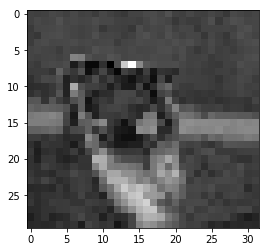

In [35]:
plt.imshow(picdata[480].reshape((30,32)), cmap=plt.get_cmap('gray'))
plt.show()

In [33]:
model3 = Sequential()

model3.add(Dense(units=30*32, activation='relu', input_shape = (30*32,)))

model3.add(Dense(units=20, activation='relu'))

model3.add(Dense(units=30*32, activation='relu'))

model3.add(Dense(units=30*32, activation='relu'))

model3.compile(loss='mean_squared_error', optimizer='adam')

model3.summary()

model3.fit(nor_picdata, nor_picdata, batch_size=100, epochs=20)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 960)               922560    
_________________________________________________________________
dense_84 (Dense)             (None, 20)                19220     
_________________________________________________________________
dense_85 (Dense)             (None, 960)               20160     
_________________________________________________________________
dense_86 (Dense)             (None, 960)               922560    
Total params: 1,884,500
Trainable params: 1,884,500
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
481/481 [==============================] - 0s - loss: 0.0708     
Epoch 2/20
481/481 [==============================] - 0s - loss: 0.0479     
Epoch 3/20
481/481 [==============================] - 0s - loss: 0.0408     
Epoch 4/20
481/481 [=============

In [34]:
model4 = Sequential()

model4.add(Dense(units = 30*32, activation='relu', input_shape = (30*32,), weights=model3.layers[0].get_weights()))

model4.add(Dense(units = 20, activation='relu', weights=model3.layers[1].get_weights()))


outdim = model4.predict(nor_picdata)
size = nor_picdata.shape[0]
outdim = outdim.sum(axis = 0)
outdim = outdim/size
print(outdim)

[ 0.          0.13656484  1.52868688  0.          1.90474999  0.          0.
  0.          0.          1.05279529  0.          0.          0.84027338
  0.          0.          0.76082993  0.          0.          0.
  0.47245732]
